### Preprocessing

In [38]:
import pickle

with open('embedding_labels.pkl', 'rb') as lf:
    labels = pickle.load(lf)

with open('embedding_posts.pkl', 'rb') as pf:
    posts = pickle.load(pf)

In [39]:
# Tokenizing data
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 50
test_samples = 39000
training_samples = 300000
validation_samples = 10000
max_words = 10000

In [40]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(posts)
sequences = tokenizer.texts_to_sequences(posts)
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 116582 unique tokens


In [4]:
data = pad_sequences(sequences, maxlen=maxlen)

In [5]:
labels = np.asarray(labels)

In [6]:
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (396704, 50)
Shape of label tensor: (396704,)


In [7]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [8]:
label_dictionary = {
    'I': 0,
    'E': 1
}

labels = [label_dictionary[label[:1]] for label in labels]

In [26]:
x_test = data[:test_samples]
y_test = labels[:test_samples]
x_train = data[test_samples:]
y_train = labels[test_samples:]

x_val = x_train[:35700]
y_val = y_train[:35700]
x_partial_train = x_train[35700:]
y_partial_train = y_train[35700:]

In [27]:
print (len(x_test))
print (len(x_train))
print (len(x_val))
print (len(x_partial_train))

39000
357704
35700
322004


In [11]:
import os

embeddings_index = {}
f = open('glove.6B.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [12]:
embedding_dim = 50
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [46]:
from keras import models
from keras import layers
from keras.layers import Embedding, Flatten, Dense, LSTM

model = models.Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_partial_train, y_partial_train,
                    epochs=10,
                    batch_size=8192,
                    validation_data=(x_val, y_val))

Train on 322004 samples, validate on 35700 samples
Epoch 1/10
322004/322004 [==============================] - 5s 17us/step - loss: 0.5725 - acc: 0.7504 - val_loss: 0.5535 - val_acc: 0.7622
Epoch 2/10
322004/322004 [==============================] - 4s 14us/step - loss: 0.5478 - acc: 0.7657 - val_loss: 0.5493 - val_acc: 0.7626
Epoch 3/10
322004/322004 [==============================] - 4s 14us/step - loss: 0.5447 - acc: 0.7658 - val_loss: 0.5483 - val_acc: 0.7626
Epoch 4/10
322004/322004 [==============================] - 4s 14us/step - loss: 0.5422 - acc: 0.7659 - val_loss: 0.5487 - val_acc: 0.7626
Epoch 5/10
322004/322004 [==============================] - 4s 12us/step - loss: 0.5398 - acc: 0.7660 - val_loss: 0.5475 - val_acc: 0.7626
Epoch 6/10
322004/322004 [==============================] - 5s 14us/step - loss: 0.5374 - acc: 0.7662 - val_loss: 0.5515 - val_acc: 0.7623
Epoch 7/10
322004/322004 [==============================] - 4s 13us/step - loss: 0.5345 - acc: 0.7664 - val_loss: 0

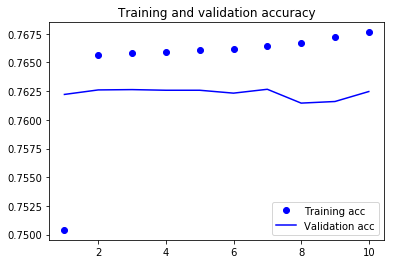

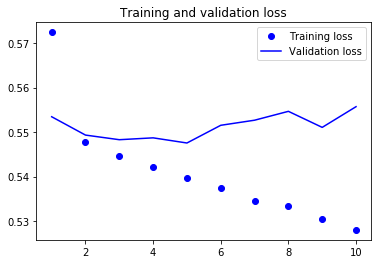

In [55]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [48]:
model = models.Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=4, batch_size=8192)
model.evaluate(x_test, y_test)

Epoch 1/4
357704/357704 [==============================] - 4s 12us/step - loss: 0.5677 - acc: 0.7496
Epoch 2/4
357704/357704 [==============================] - 5s 13us/step - loss: 0.5481 - acc: 0.7653
Epoch 3/4
357704/357704 [==============================] - 4s 12us/step - loss: 0.5446 - acc: 0.7655
Epoch 4/4
39000/39000 [==============================] - 1s 31us/step


[0.5431598484149346, 0.7676410256287991]